In [1]:
import numpy as np
import matplotlib.pyplot as pl
import qnm
import qnm_filter

## NNI

In [2]:
data = np.loadtxt("results/221_realisation1.dat")
[t_range, signal, signal220, signal221, signalH_noise] = data
injected = (100, 0.4)
mass = qnm_filter.Filter.mass_unit(injected[0])

(0.0, 0.04925490947641268)

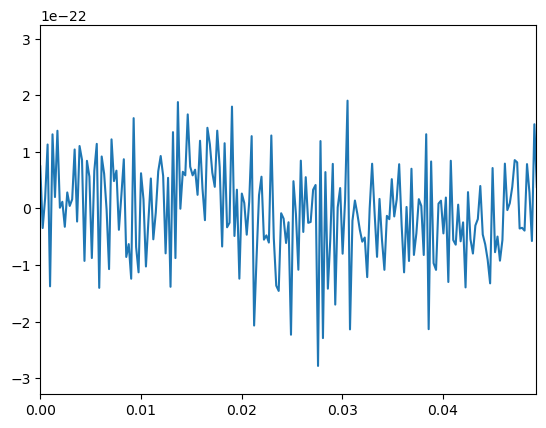

In [3]:
pl.plot(t_range, signalH_noise)
pl.xlim(0, 100*mass)

In [4]:
fit = qnm_filter.Network(segment_length=0.2, srate=4096 * 1, t_init=50*mass)
fit.original_data['H1'] = qnm_filter.RealData(signal, index=t_range)
fit.detector_alignment()
fit.pure_noise = {}
fit.pure_noise['H1'] = qnm_filter.RealData(signalH_noise, index=t_range)
fit.condition_data('original_data')
fit.condition_data('pure_noise')
fit.compute_acfs('pure_noise')
fit.cholesky_decomposition()
fit.first_index()

0.02462745473820634
2149


In [5]:
fit.original_data['H1'] = qnm_filter.RealData(signal, index=t_range)
fit.detector_alignment()
fit.condition_data('original_data')

In [6]:
fit.original_data['H1'].time[2149]

0.024658203125

In [25]:
fit.pure_nr = {}
fit.pure_nr["H1"] = qnm_filter.RealData(signal221, index=t_range, ifo="H1")
fit.original_data['H1'] = qnm_filter.RealData(signal221+signalH_noise, index=t_range, ifo="H1")
fit.condition_data('pure_nr', remove_mean=False)
fit.condition_data('original_data', remove_mean=False)
SNR221_MF = fit.compute_SNR(
    fit.truncate_data(fit.original_data)["H1"],
    fit.truncate_data(fit.pure_nr)["H1"],
    "H1",
    True,
)

0.024658   -2.441214e-23
dtype: float64
0.024658   -4.449876e-27
dtype: float64


In [26]:
SNR221_MF

0.0002800594443923323

In [10]:
fit.start_times['H1']

0.02462745473820634

In [11]:
print(fit.i0_dict['H1'])

2149


In [12]:
t0 = fit.start_times['H1']
abs(t_range - t0).argmin()

4197

(-4.458e-24, -4.451e-24)

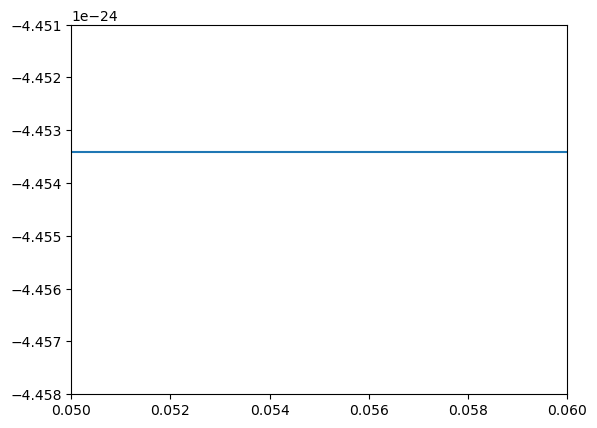

In [24]:
# fit.pure_nr["H1"] = qnm_filter.RealData(signal220, index=t_range, ifo="H1")
# fit.condition_data('pure_nr')
# pl.plot(fit.pure_nr['H1'])
fit.pure_nr["H1"] = qnm_filter.RealData(signal221, index=t_range, ifo="H1")
fit.condition_data('pure_nr')
pl.plot(fit.pure_nr['H1'])
pl.xlim(0.05, 0.06)
pl.ylim(-4.458e-24, -4.451e-24)

0.024658   -4.457866e-24
dtype: float64


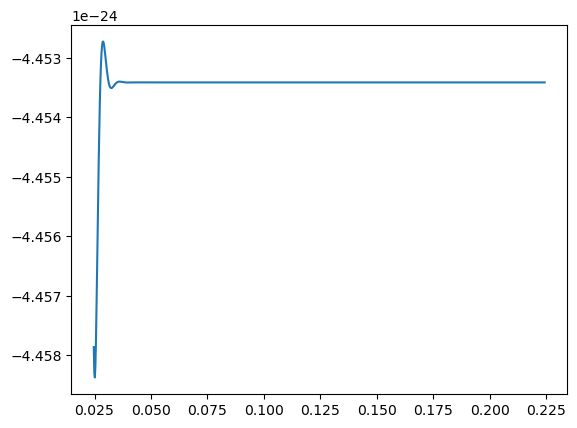

In [18]:
pl.plot(fit.truncate_data(fit.pure_nr)["H1"])